### Pyber Analysis
  #### Observed Trends
   - 68.4% rides came from Urban cities.  As shown from the data, the demand for rides is mostly in the Urban cities where totla number of rides range for the Urban cities range from 20-35 rides.  
   - Rides from Rural cities had the least number of total drivers and number of rides.  However, the average fare for Rural cities tended to be higher than Suburban and Urban cities.  This is probably due to less population density and greater area.
   - Suburban cities fall in the middle with total number of rides for each city ranging from 10-20 and average fares on average, higher than Urban cities.  

In [4]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
# Import data into pandas from CSV
ride_data = pd.read_csv('ride_data.csv')
city_data = pd.read_csv('city_data.csv')

# Check for and drop duplicates
city_data = city_data.drop_duplicates("city")

# Merge two files into one
combined_data = pd.merge(ride_data, city_data, on = 'city')

# Get the merged file by "type"
combined_data_rural = combined_data[combined_data['type'] == "Rural"]
combined_data_suburban = combined_data[combined_data['type'] == "Suburban"]
combined_data_urban = combined_data[combined_data['type'] == "Urban"]
combined_data_urban.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


### Bubble Plot of Ride Sharing Data

In [6]:
# Get the average fare by type
avg_fare_rural = combined_data_rural.groupby("city")["fare"].mean()
avg_fare_suburban = combined_data_suburban.groupby("city")["fare"].mean()
avg_fare_urban = combined_data_urban.groupby("city")["fare"].mean()

# Get rides per city by type
rides_per_city_rural = combined_data_rural.groupby("city")["ride_id"].count()
rides_per_city_suburban = combined_data_suburban.groupby("city")["ride_id"].count()
rides_per_city_urban = combined_data_urban.groupby("city")["ride_id"].count()

# Get drive counts of cities by type
cities_r = city_data[city_data['type'] == "Rural"]
cities_s = city_data[city_data['type'] == "Suburban"]
cities_u = city_data[city_data['type'] == "Urban"]

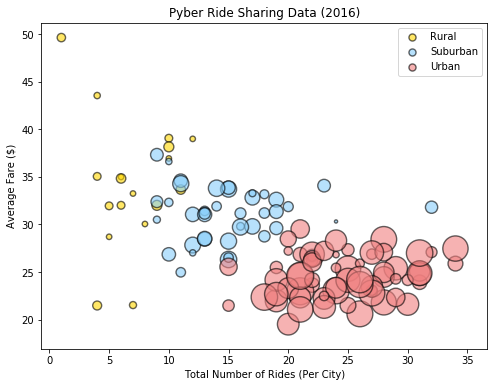

In [18]:
# Create the scatter plot for each city type
fig = plt.figure(figsize = (8,6))
rural_handle = plt.scatter(rides_per_city_rural, avg_fare_rural, marker ='o', s = cities_r["driver_count"]*10,  c= "gold", alpha=0.6, edgecolors="black", linewidth=1.4, label="Rural")
suburban_handle = plt.scatter(rides_per_city_suburban, avg_fare_suburban, marker ='o', s = cities_s["driver_count"]*10,  c= "lightskyblue", alpha=0.6, edgecolors="black", linewidth=1.4, label="Suburban")
urban_handle = plt.scatter(rides_per_city_urban, avg_fare_urban, marker ='o', s = cities_u["driver_count"]*10,  c= "lightcoral", alpha=0.6, edgecolors="black", linewidth=1.4, label="Urban")

# Create the axes and title for the graph
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Specify the legend details and show the scatter plot
lgnd=plt.legend(handles=[rural_handle, suburban_handle, urban_handle],  loc= "upper right")
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]
plt.show()

### Total Fare by City Type

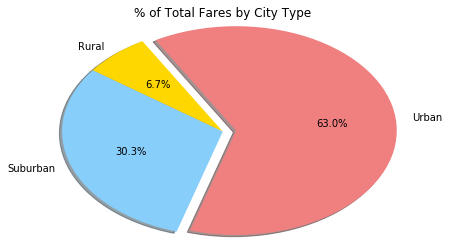

In [8]:
# Calculate the total fare by city type and corresponding percentage
perc_fare = combined_data.groupby("type")["fare"].sum().reset_index()
total_fare = combined_data["fare"].sum()
perc_fare["Percent of Total Fares"] = 100 * perc_fare["fare"]/total_fare

# Define attributes of chart
perc_fare_type = perc_fare["type"]
percentage_fares = perc_fare["Percent of Total Fares"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

# Define the chart title and create pie chart
plt.title("% of Total Fares by City Type")
plt.pie(percentage_fares, explode=explode, labels=perc_fare_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120,radius = 1.2)

plt.show()

### Total Rides by City Type

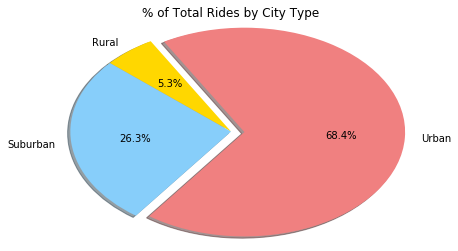

In [10]:
# Calculate the total rides by city type and corresponding percentage
perc_total_rides = combined_data.groupby("type")["ride_id"].count().reset_index()
total_rides = combined_data["ride_id"].count()
perc_total_rides["Percent of Total Rides"] = 100 * perc_total_rides["ride_id"]/total_rides

# Define attributes of chart
perc_rides_type = perc_total_rides["type"]
percentage_rides = perc_total_rides["Percent of Total Rides"]
colors1 = ["gold", "lightskyblue", "lightcoral"]
explode1 = (0, 0, 0.1)

# Define the chart title and create pie chart
plt.title("% of Total Rides by City Type")
plt.pie(percentage_rides, explode=explode1, labels=perc_rides_type, colors=colors1,
        autopct="%1.1f%%", shadow=True, startangle=120,radius = 1.2)

plt.show()

### Total Drivers by City Type

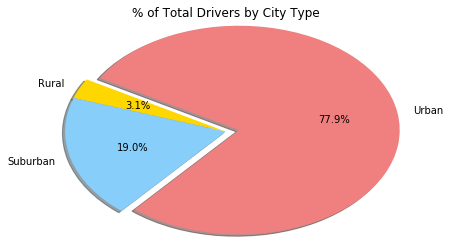

In [11]:
# Calculate the total number of drivers by city type and corresponding percentage
perc_total_drivers = city_data.groupby("type")["driver_count"].sum().reset_index()
total_drivers = city_data["driver_count"].sum()
perc_total_drivers["Percent of Total Drivers"] = 100 * perc_total_drivers["driver_count"]/total_drivers

# Define attributes of chart
perc_drivers_type = perc_total_drivers["type"]
percentage_drivers = perc_total_drivers["Percent of Total Drivers"]
colors2 = ["gold", "lightskyblue", "lightcoral"]
explode2 = (0, 0, 0.1)

# Define the chart title and create pie chart
plt.title("% of Total Drivers by City Type")
plt.pie(percentage_drivers, explode=explode2, labels=perc_drivers_type, colors=colors2,
        autopct="%1.1f%%", shadow=True, startangle=150,radius = 1.2)

plt.show()